In [1]:
import duckdb as ddb

c = ddb.connect("nyc-taxi.duckdb")
c

In [2]:
green_parquets = "data/green/data.parquet/*/*.parquet"

In [27]:
import numpy as np
import pandas as pd
import dask.dataframe as dd

from distributed import Client

In [4]:
dc = Client()
dc

2022-07-17 14:01:21,107 - distributed.diskutils - INFO - Found stale lock file and directory '/var/folders/_0/t5bjjwjn59d2y86rr301hl380000gp/T/dask-worker-space/worker-jmbyejwf', purging
2022-07-17 14:01:21,107 - distributed.diskutils - INFO - Found stale lock file and directory '/var/folders/_0/t5bjjwjn59d2y86rr301hl380000gp/T/dask-worker-space/worker-bjgwcqil', purging
2022-07-17 14:01:21,107 - distributed.diskutils - INFO - Found stale lock file and directory '/var/folders/_0/t5bjjwjn59d2y86rr301hl380000gp/T/dask-worker-space/worker-4z5bhib8', purging
2022-07-17 14:01:21,107 - distributed.diskutils - INFO - Found stale lock file and directory '/var/folders/_0/t5bjjwjn59d2y86rr301hl380000gp/T/dask-worker-space/worker-olbpb844', purging


Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:8787/status,
Dashboard: http://127.0.0.1:8787/status,Workers: 4
Total threads: 8,Total memory: 16.00 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:51319,Workers: 4
Dashboard: http://127.0.0.1:8787/status,Total threads: 8
Started: Just now,Total memory: 16.00 GiB
Comm: tcp://127.0.0.1:51340,Total threads: 2
Dashboard: http://127.0.0.1:51342/status,Memory: 4.00 GiB
Nanny: tcp://127.0.0.1:51323,


In [5]:
%%time
engine = "pyarrow"
#engine = "fastparquet"

columns = {
    "VendorID": np.int64,
    "lpep_pickup_datetime": np.datetime64,
    "lpep_dropoff_datetime": np.datetime64,
    "store_and_fwd_flag": str,
    "RatecodeID": np.float64,
    "PULocationID": np.int64,
    "DOLocationID": np.int64,
    "passenger_count": np.float64,
    "trip_distance": np.float64,
    "fare_amount": np.float64,
    "extra": np.float64,
    "mta_tax": np.float64,
    "tip_amount": np.float64,
    "tolls_amount": np.float64,
    #"ehail_fee": np.float64,
    "improvement_surcharge": np.float64,
    "total_amount": np.float64,
    "payment_type": np.float64,
    "trip_type": np.float64,
    #"congestion_surcharge": np.float64,
}
ddf = dd.read_parquet(green_parquets, columns=columns, engine=engine)
ddf

CPU times: user 13.6 ms, sys: 5.24 ms, total: 18.8 ms
Wall time: 19.4 ms


,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type
npartitions=100,,,,,,,,,,,,,,,,,,
,int64,datetime64[ns],datetime64[ns],object,int64,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,int64,float64
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


In [6]:
ddf.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type
0,2,2014-01-01 00:17:26,2014-01-01 00:37:11,N,1,17,225,1,2.28,13.5,0.5,0.5,0.00,0.0,NaN,14.50,2,NaN
1,1,2014-01-01 00:29:12,2014-01-01 00:37:43,N,1,127,241,1,2.10,9.0,0.0,0.5,0.00,0.0,NaN,9.50,2,NaN
2,2,2014-01-01 00:31:35,2014-01-01 00:44:09,N,1,166,243,1,4.72,15.5,0.5,0.5,4.00,0.0,NaN,20.50,1,NaN
3,2,2014-01-01 00:07:01,2014-01-01 00:21:54,N,1,7,157,1,2.88,13.0,0.5,0.5,2.88,0.0,NaN,16.88,1,NaN
4,2,2014-01-01 00:26:43,2014-01-01 00:37:17,N,1,83,197,2,3.80,13.0,0.5,0.5,0.00,0.0,NaN,14.00,2,NaN


In [7]:
%%time
ddf.fillna(0).describe().compute()

2022-07-17 14:01:36,238 - distributed.utils_perf - WARNING - full garbage collections took 25% CPU time recently (threshold: 10%)
2022-07-17 14:01:36,416 - distributed.utils_perf - WARNING - full garbage collections took 25% CPU time recently (threshold: 10%)
2022-07-17 14:01:37,668 - distributed.utils_perf - WARNING - full garbage collections took 25% CPU time recently (threshold: 10%)
2022-07-17 14:01:37,760 - distributed.utils_perf - WARNING - full garbage collections took 25% CPU time recently (threshold: 10%)
2022-07-17 14:01:37,855 - distributed.utils_perf - WARNING - full garbage collections took 25% CPU time recently (threshold: 10%)
2022-07-17 14:01:38,452 - distributed.utils_perf - WARNING - full garbage collections took 25% CPU time recently (threshold: 10%)
2022-07-17 14:01:38,830 - distributed.utils_perf - WARNING - full garbage collections took 25% CPU time recently (threshold: 10%)
2022-07-17 14:01:39,703 - distributed.utils_perf - WARNING - full garbage collections took

CPU times: user 23 s, sys: 2.88 s, total: 25.9 s
Wall time: 1min 32s


,VendorID,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type
count,8.148358e+07,8.148358e+07,8.148358e+07,8.148358e+07,8.148358e+07,8.148358e+07,8.148358e+07,8.148358e+07,8.148358e+07,8.148358e+07,8.148358e+07,8.148358e+07,8.148358e+07,8.148358e+07,8.148358e+07
mean,1.802288e+00,1.079159e+00,1.155094e+02,1.306785e+02,1.341356e+00,5.432938e+00,1.284675e+01,3.889186e-01,4.814713e-01,1.144754e+00,1.457496e-01,2.320779e-01,1.530584e+01,1.489092e+00,9.791430e-01
std,3.983428e-01,7.043165e-01,7.671887e+01,7.725185e+01,1.057231e+00,5.352399e+02,1.126943e+01,5.243251e-01,1.002055e-01,2.624951e+00,1.515288e+00,1.266360e-01,1.109913e+02,5.625306e-01,2.555502e-01
min,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,-2.032908e+04,-8.900000e+02,-2.542000e+01,-4.950000e+01,-1.010000e+02,-8.000000e+01,-3.000000e-01,-8.903000e+02,0.000000e+00,0.000000e+00
25%,2.000000e+00,1.000000e+00,6.600000e+01,7.400000e+01,1.000000e+00,1.410000e+00,8.500000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,3.000000e-01,1.056000e+01,1.000000e+00,1.000000e+00
50%,2.000000e+00,1.000000e+00,9.700000e+01,1.380000e+02,1.000000e+00,3.050000e+00,1.350000e+01,5.000000e-01,5.000000e-01,1.290000e+00,0.000000e+00,3.000000e-01,1.630000e+01,2.000000e+00,1.000000e+00
75%,2.000000e+00,1.000000e+00,1.810000e+02,2.170000e+02,1.000000e+00,7.320000e+00,2.765000e+01,1.000000e+00,5.000000e-01,3.000000e+00,0.000000e+00,3.000000e-01,3.250000e+01,2.000000e+00,1.000000e+00
max,6.000000e+00,9.900000e+01,2.650000e+02,2.650000e+02,4.800000e+01,3.343032e+05,1.044584e+04,5.658400e+02,8.291000e+01,2.017730e+03,7.999920e+03,1.770000e+00,9.899704e+05,5.000000e+00,2.000000e+00


In [12]:
%%time

query = """
select
    *
from green
where tip_amount < 0
""".lstrip()

df = c.execute(query).df()
df.head()

CPU times: user 357 ms, sys: 176 ms, total: 533 ms
Wall time: 1.17 s


,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2022-04-01 13:51:37,2022-04-01 13:51:41,N,1.0,193,193,1.0,0.0,-2.5,0.0,-0.5,-0.66,0.0,NaN,-0.3,-3.96,3.0,1.0,0.0
1,2,2022-04-01 14:52:06,2022-04-01 14:52:57,N,1.0,193,193,1.0,0.0,-2.5,0.0,-0.5,-0.66,0.0,NaN,-0.3,-3.96,3.0,1.0,0.0
2,2,2022-01-03 10:33:34,2022-01-03 10:33:58,N,1.0,193,193,1.0,0.0,-2.5,0.0,-0.5,-0.66,0.0,NaN,-0.3,-3.96,3.0,1.0,0.0
3,2,2022-03-01 13:04:15,2022-03-01 13:04:33,N,1.0,193,193,1.0,0.0,-2.5,0.0,-0.5,-0.66,0.0,NaN,-0.3,-3.96,3.0,1.0,0.0
4,2,2022-02-03 12:24:32,2022-02-03 12:24:55,N,1.0,193,193,2.0,0.0,-2.5,0.0,-0.5,-0.66,0.0,NaN,-0.3,-3.96,3.0,1.0,0.0


In [13]:
len(df)

774

In [15]:
df.tail()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
769,2,2018-05-25 18:04:37,2018-05-25 18:05:13,N,1.0,193,193,1.0,0.00,-2.5,-1.0,-0.5,-1.08,0.0,NaN,-0.3,-5.38,3.0,1.0,NaN
770,2,2018-04-28 03:01:48,2018-04-28 03:08:57,N,1.0,129,70,1.0,0.99,-6.5,-0.5,-0.5,-100.00,0.0,NaN,-0.3,-107.80,4.0,1.0,NaN
771,2,2018-06-26 08:58:46,2018-06-26 08:58:58,N,1.0,264,33,1.0,0.00,-2.5,0.0,-0.5,-0.66,0.0,NaN,-0.3,-5.91,3.0,1.0,NaN
772,2,2018-07-28 22:57:07,2018-07-28 22:58:10,N,1.0,10,10,1.0,0.04,-2.5,-0.5,-0.5,-0.95,0.0,NaN,-0.3,-9.70,4.0,1.0,NaN
773,2,2018-05-29 20:55:15,2018-05-29 20:55:19,N,1.0,193,193,1.0,0.00,-2.5,-0.5,-0.5,-2.00,0.0,NaN,-0.3,-5.80,3.0,1.0,NaN


In [22]:
xmin = min(df["tip_amount"])
xmin

-100.0

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="darkgrid")
sns.set(rc={"figure.figsize": (16, 18)})
plt.style.use("dark_background")

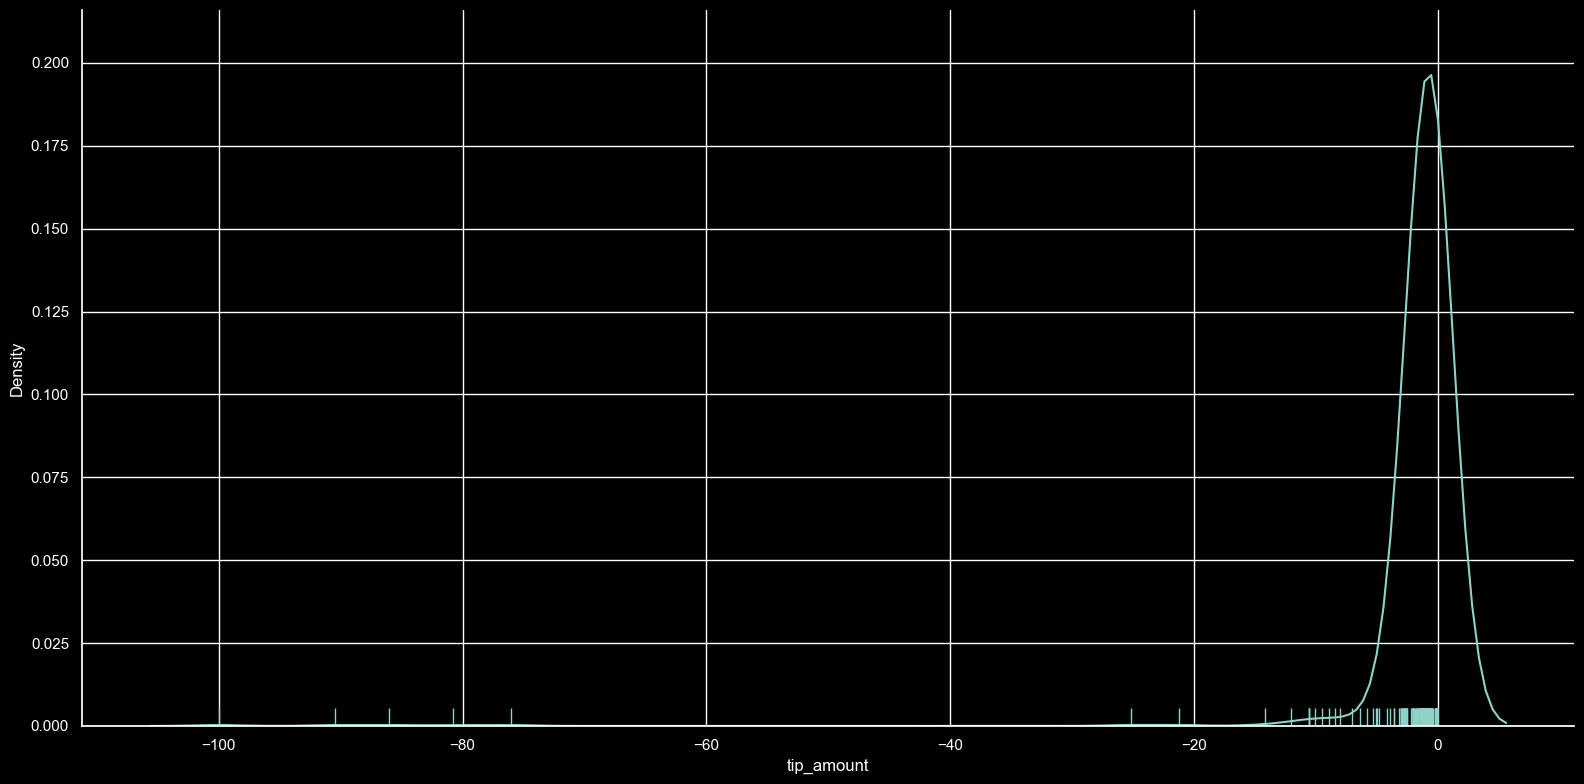

In [29]:
sns.displot(data=df, x="tip_amount", rug=True, height=8, aspect=2.0, kind="kde")

/Users/cody/venvs/ddb/lib/python3.9/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/Users/cody/venvs/ddb/lib/python3.9/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/Users/cody/venvs/ddb/lib/python3.9/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


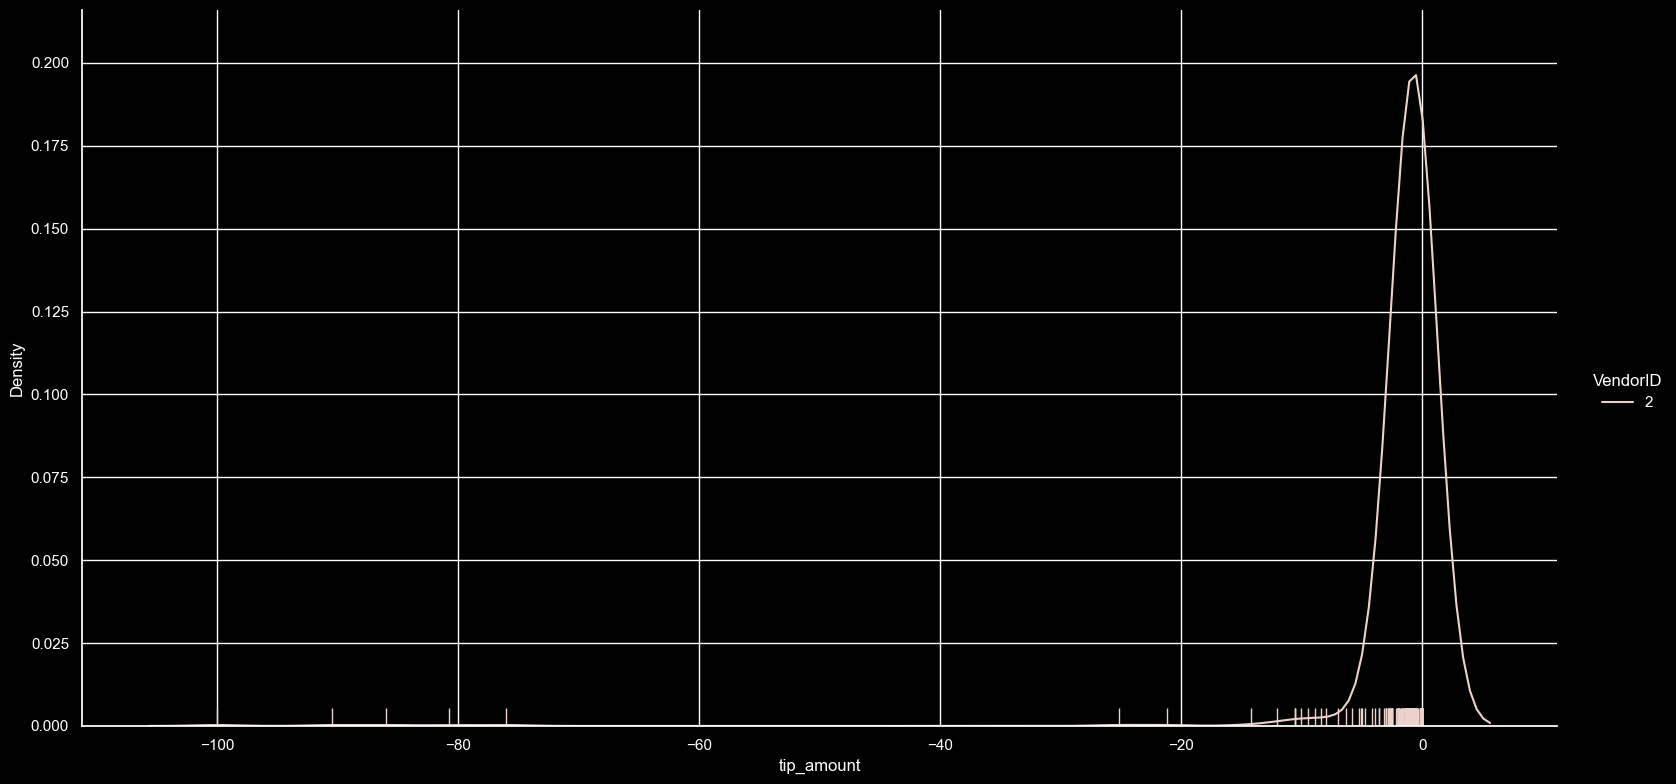

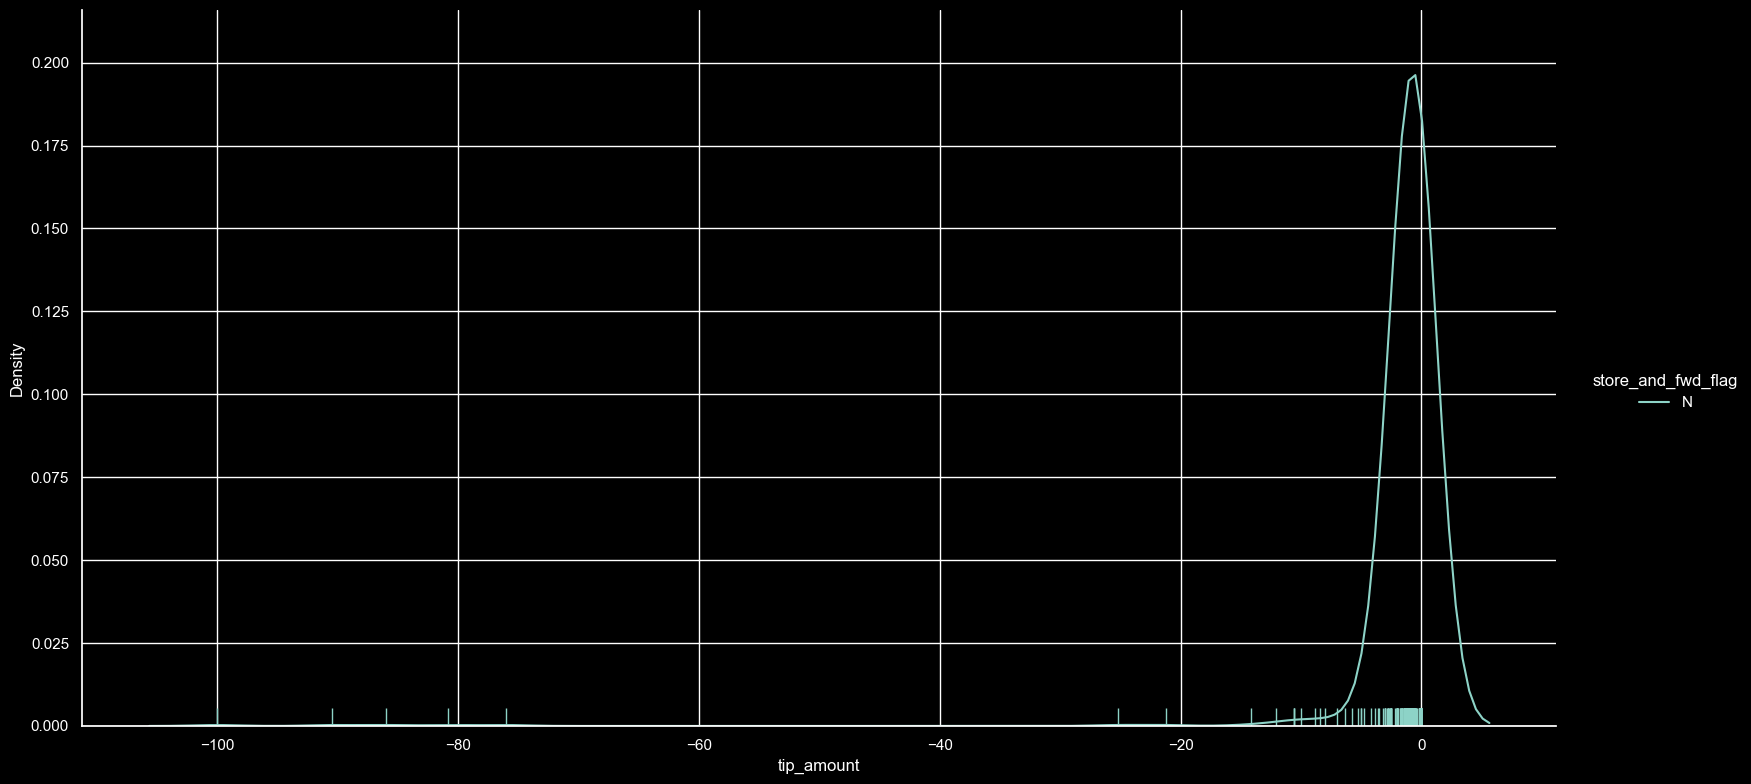

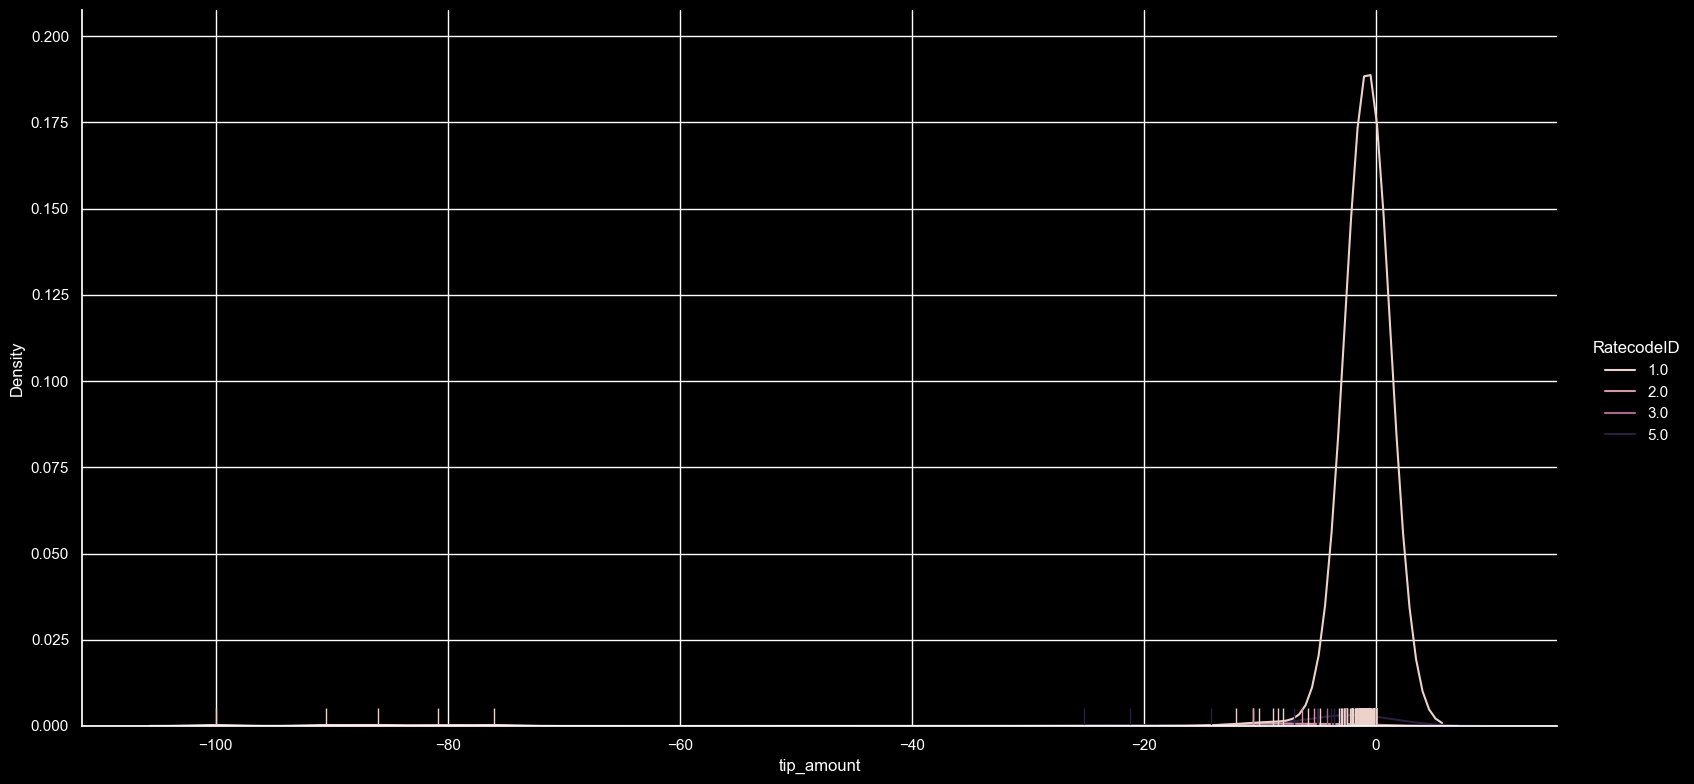

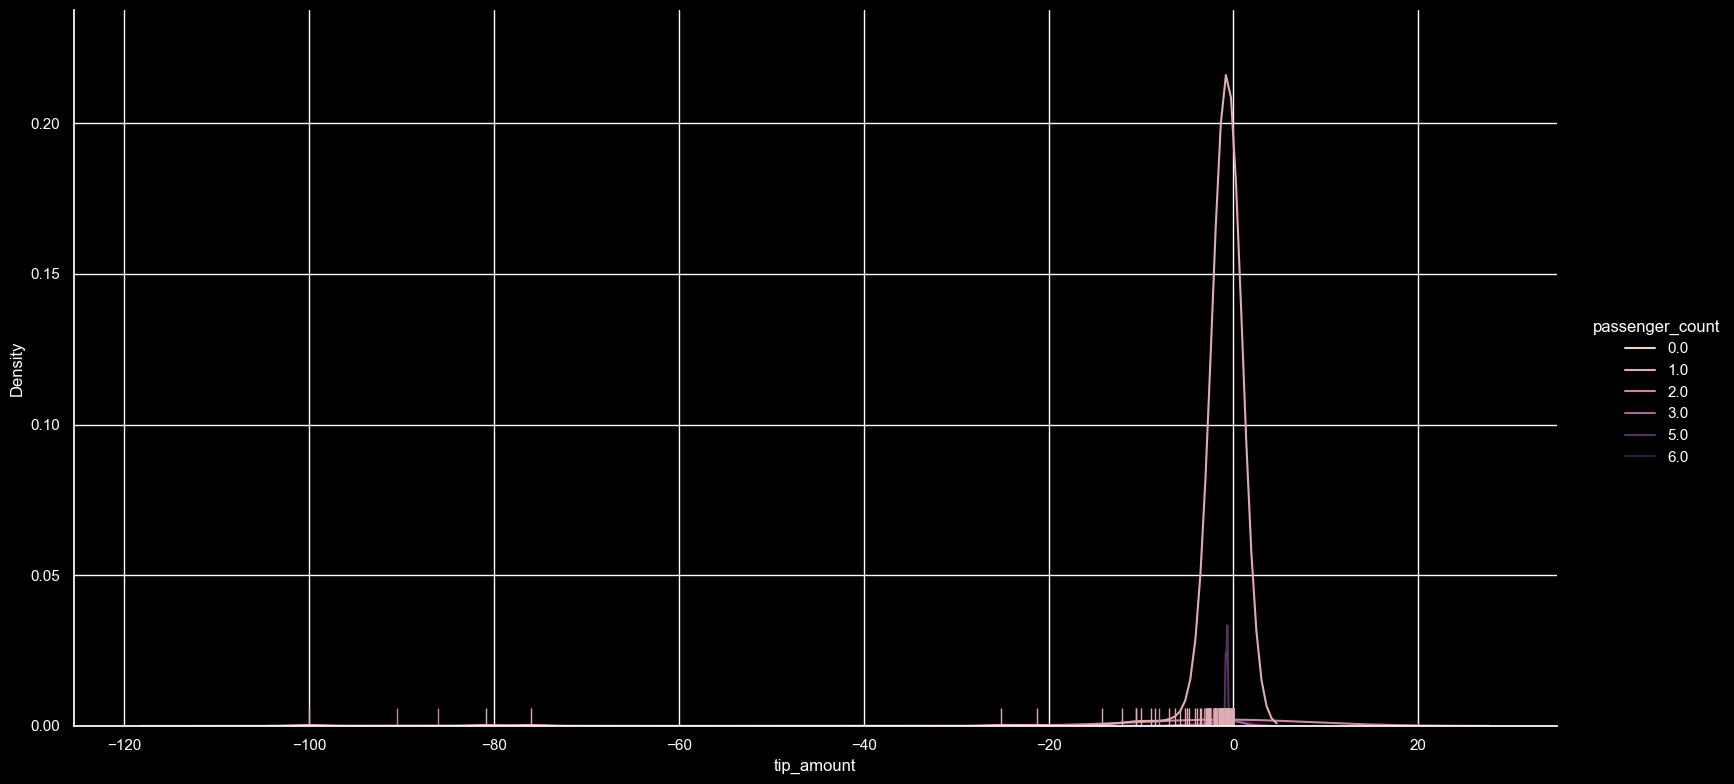

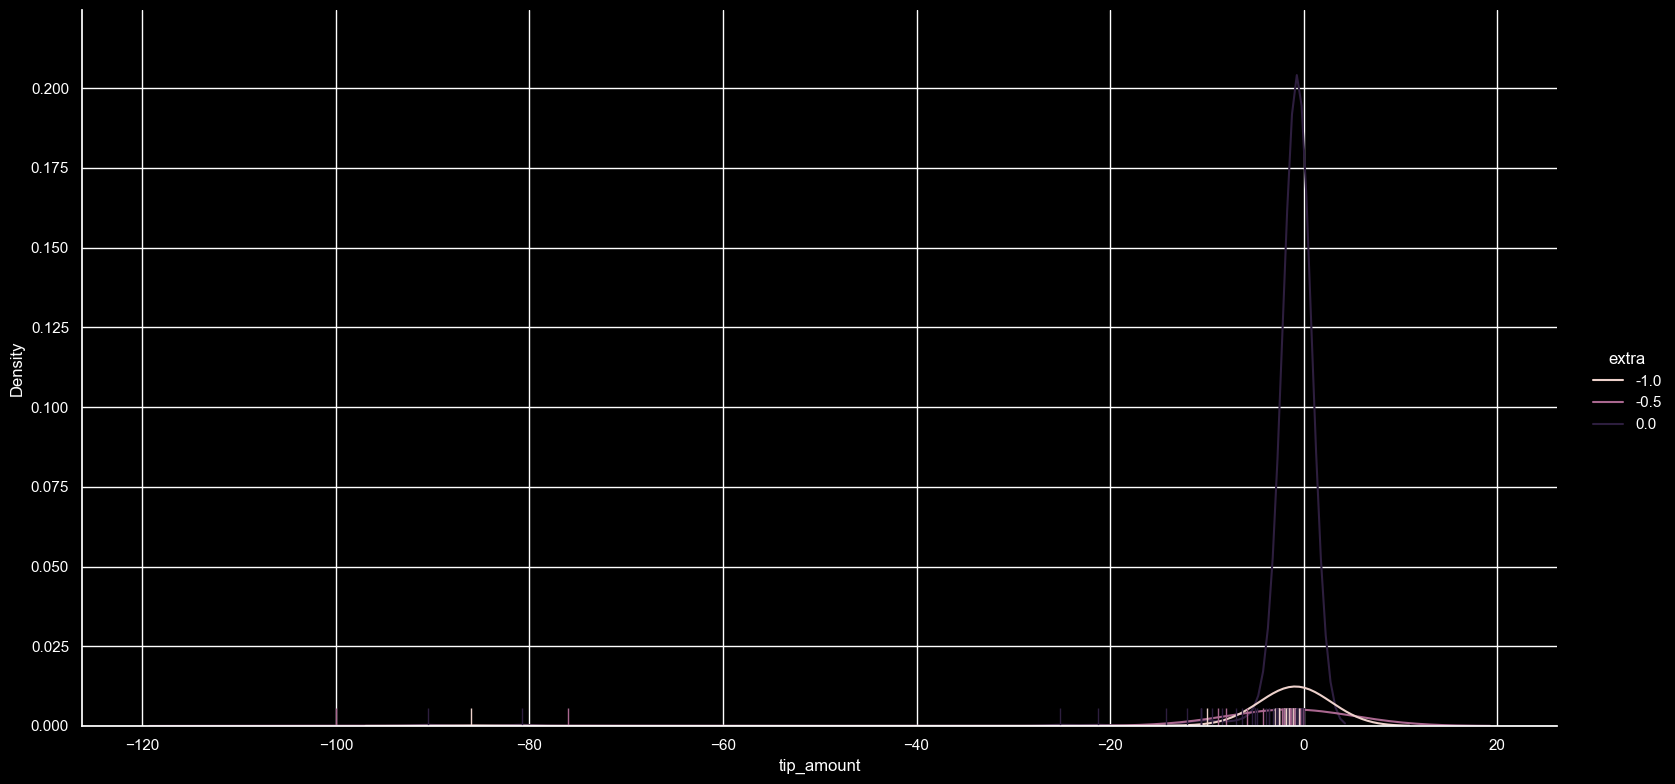

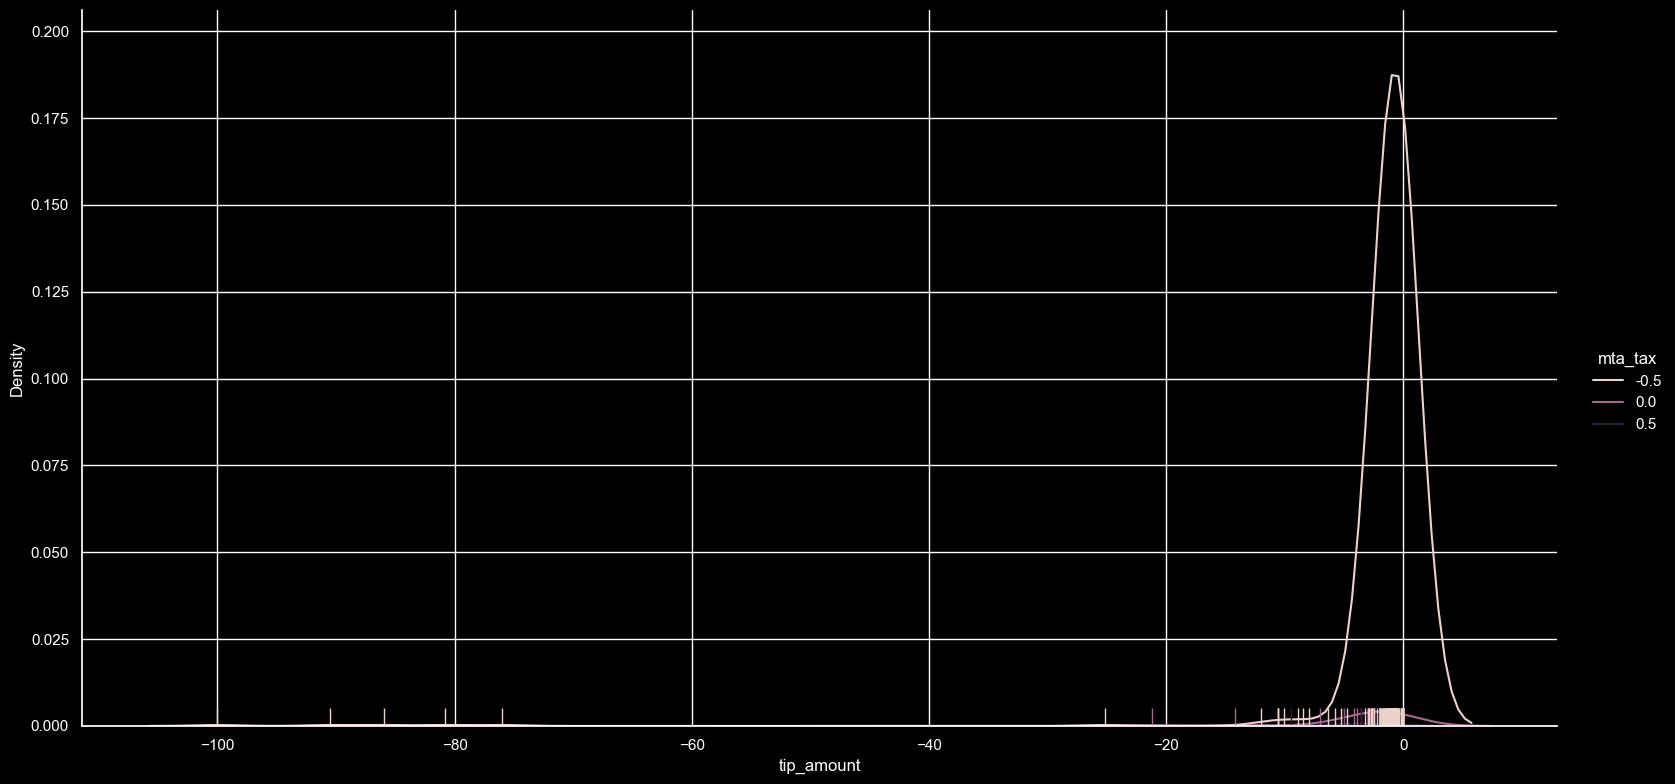

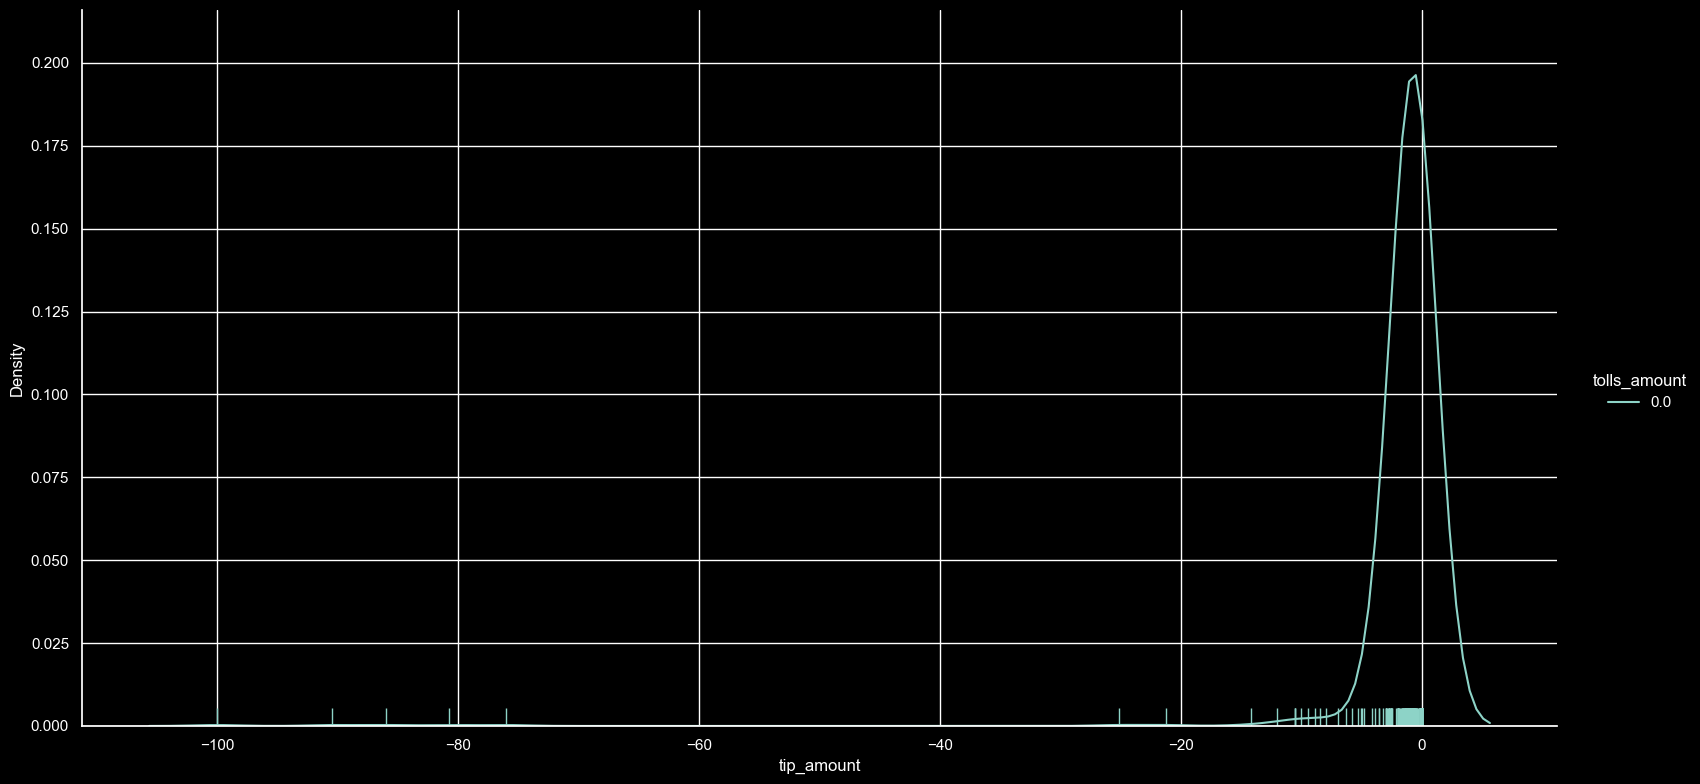

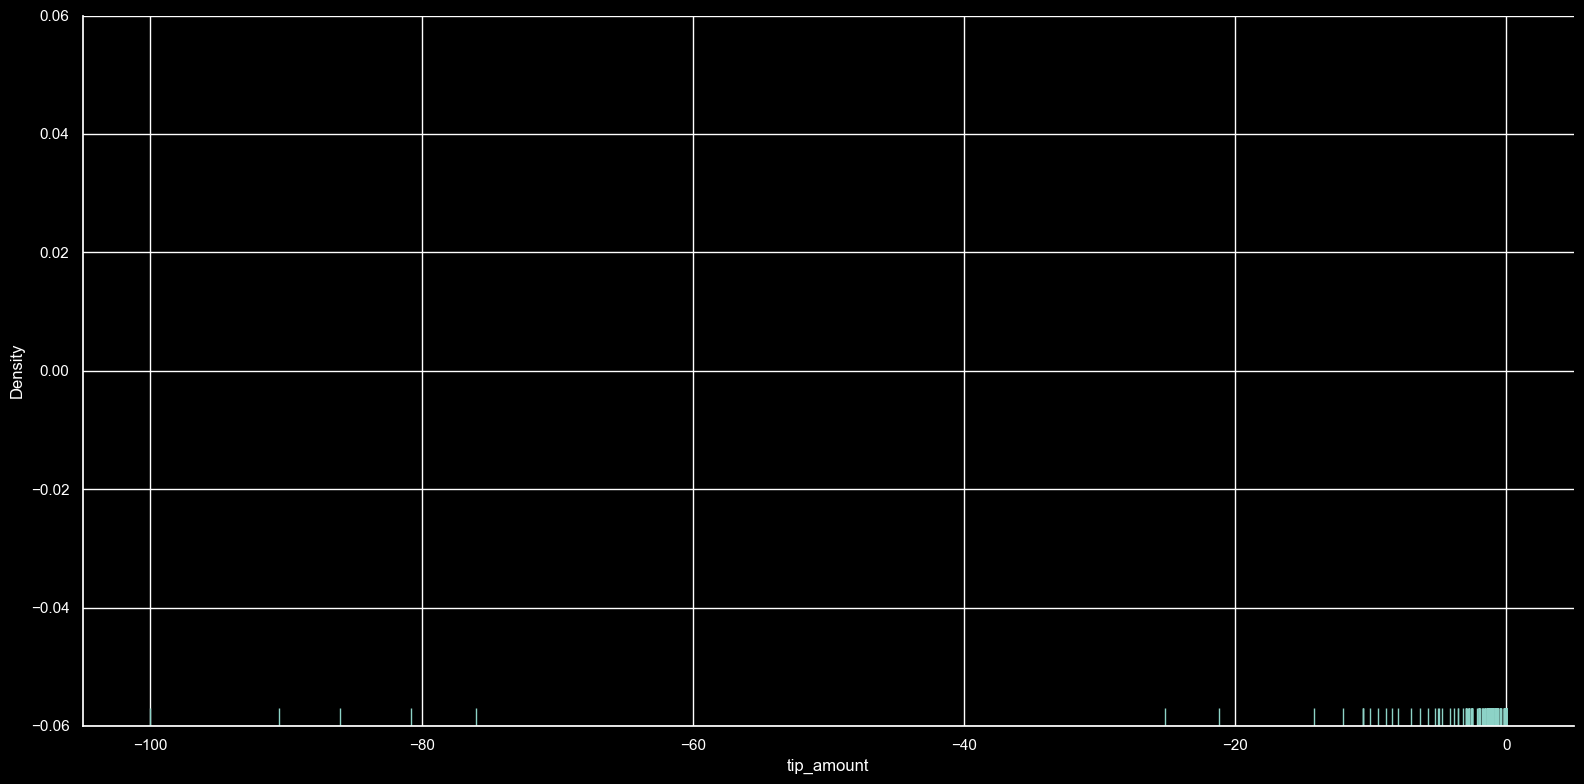

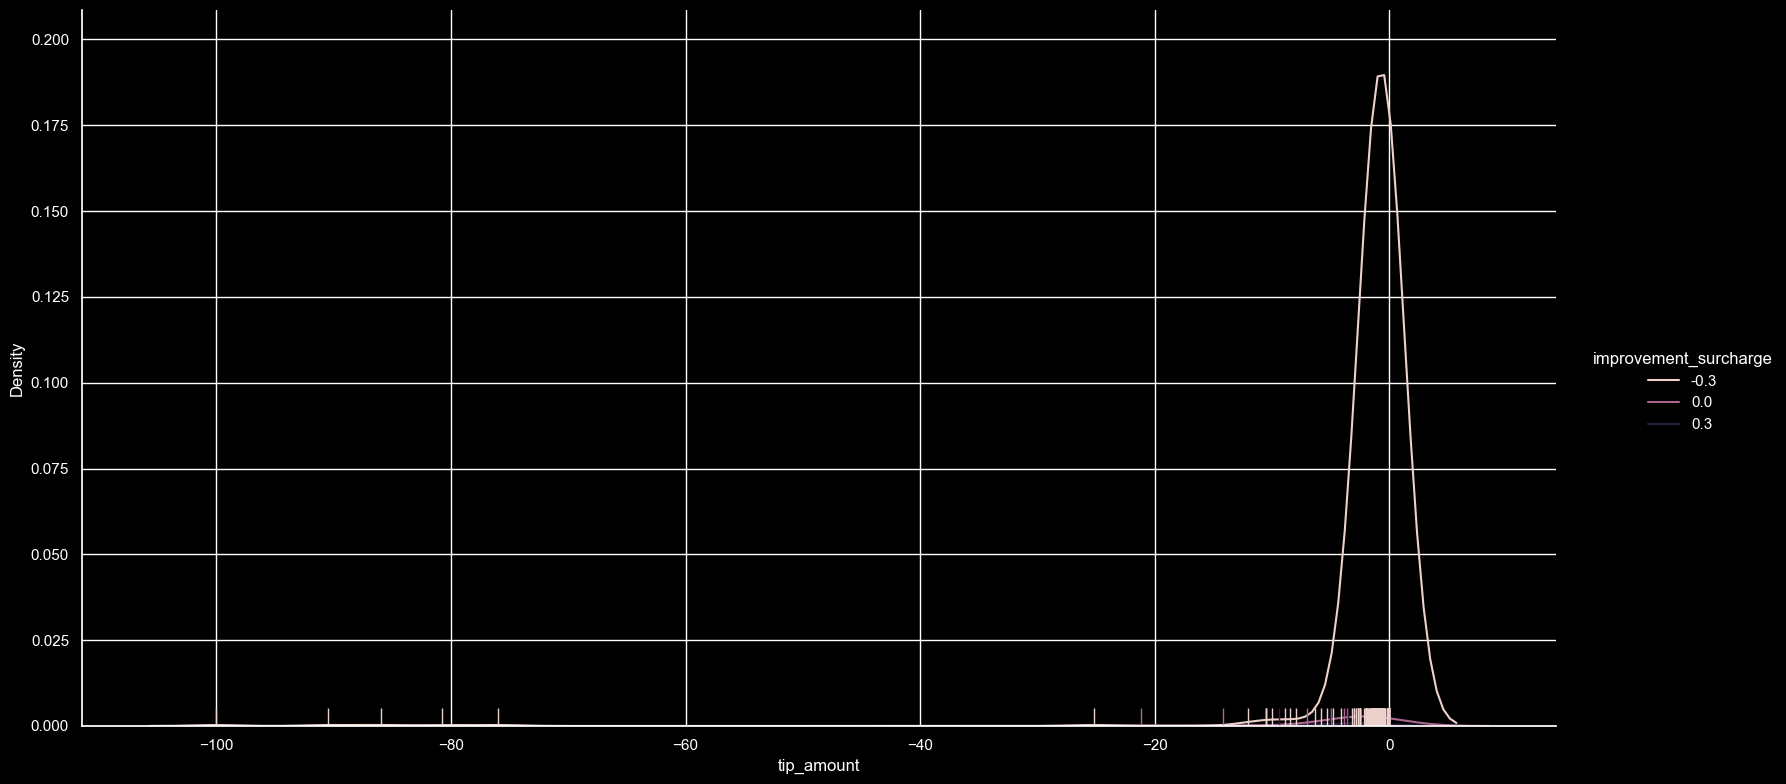

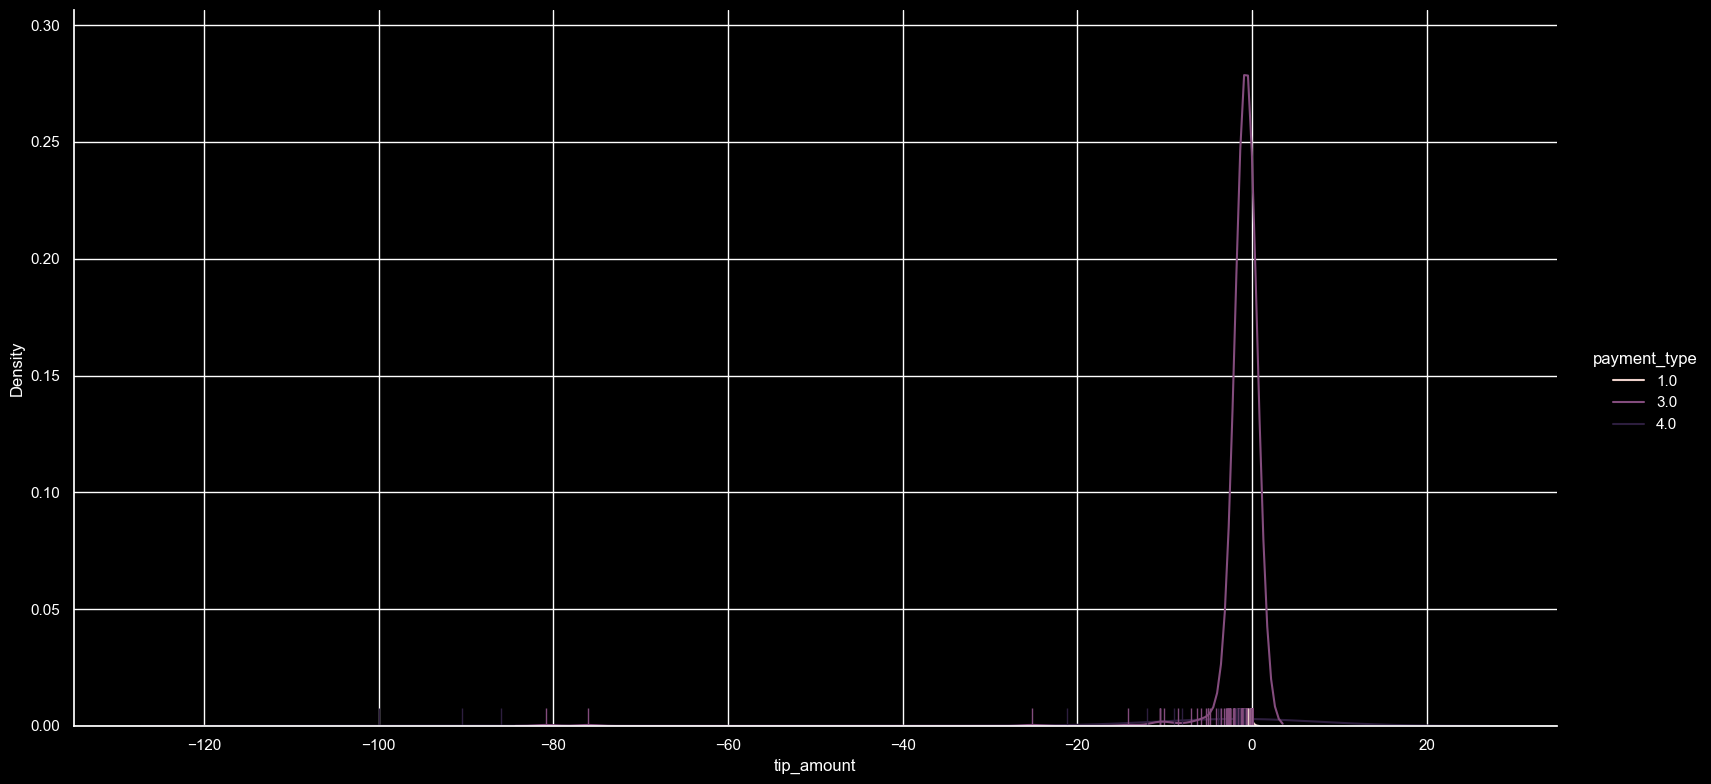

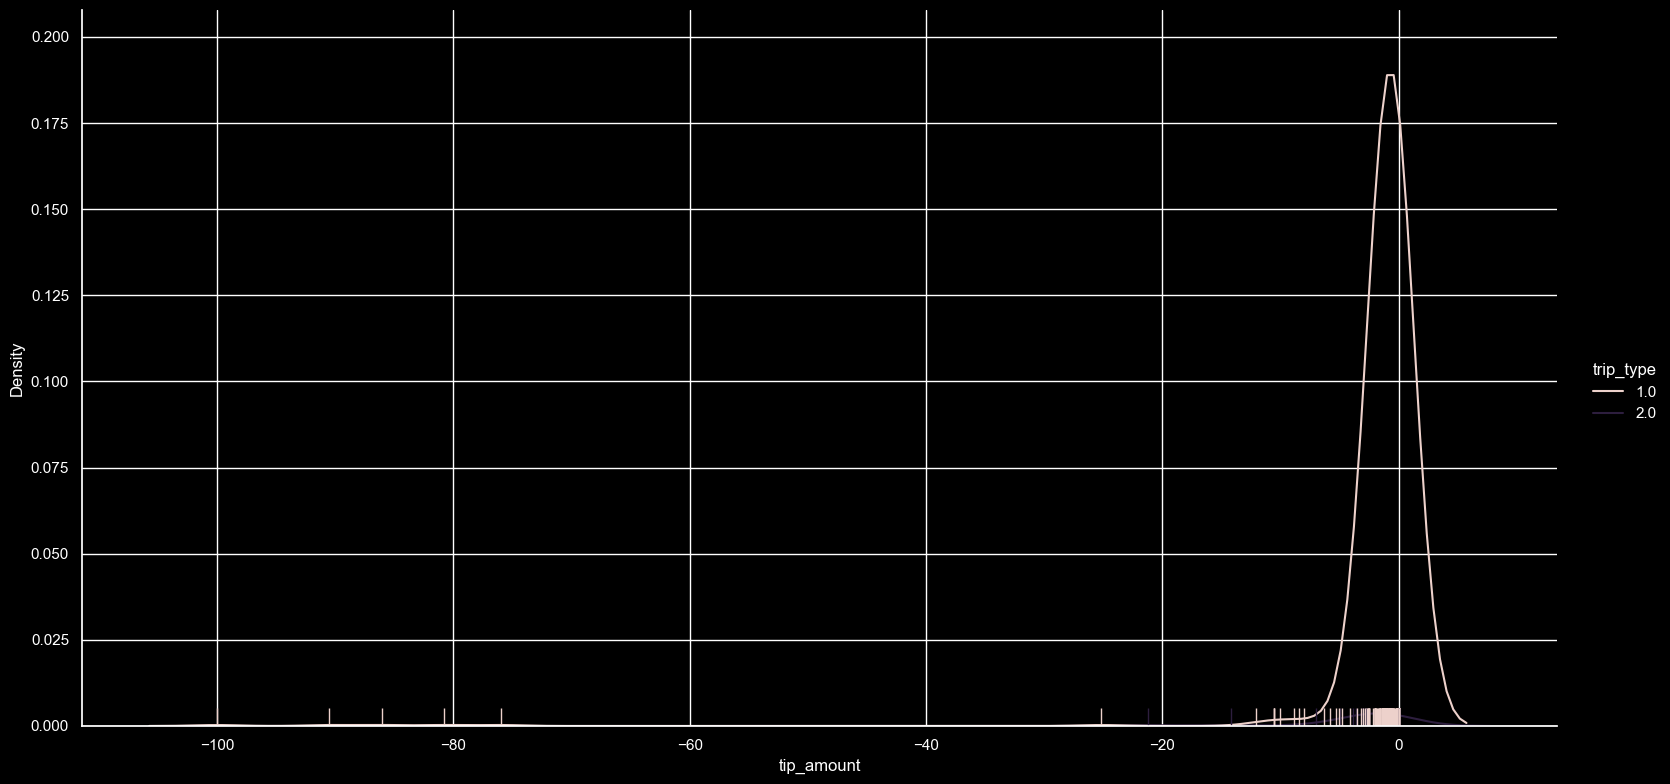

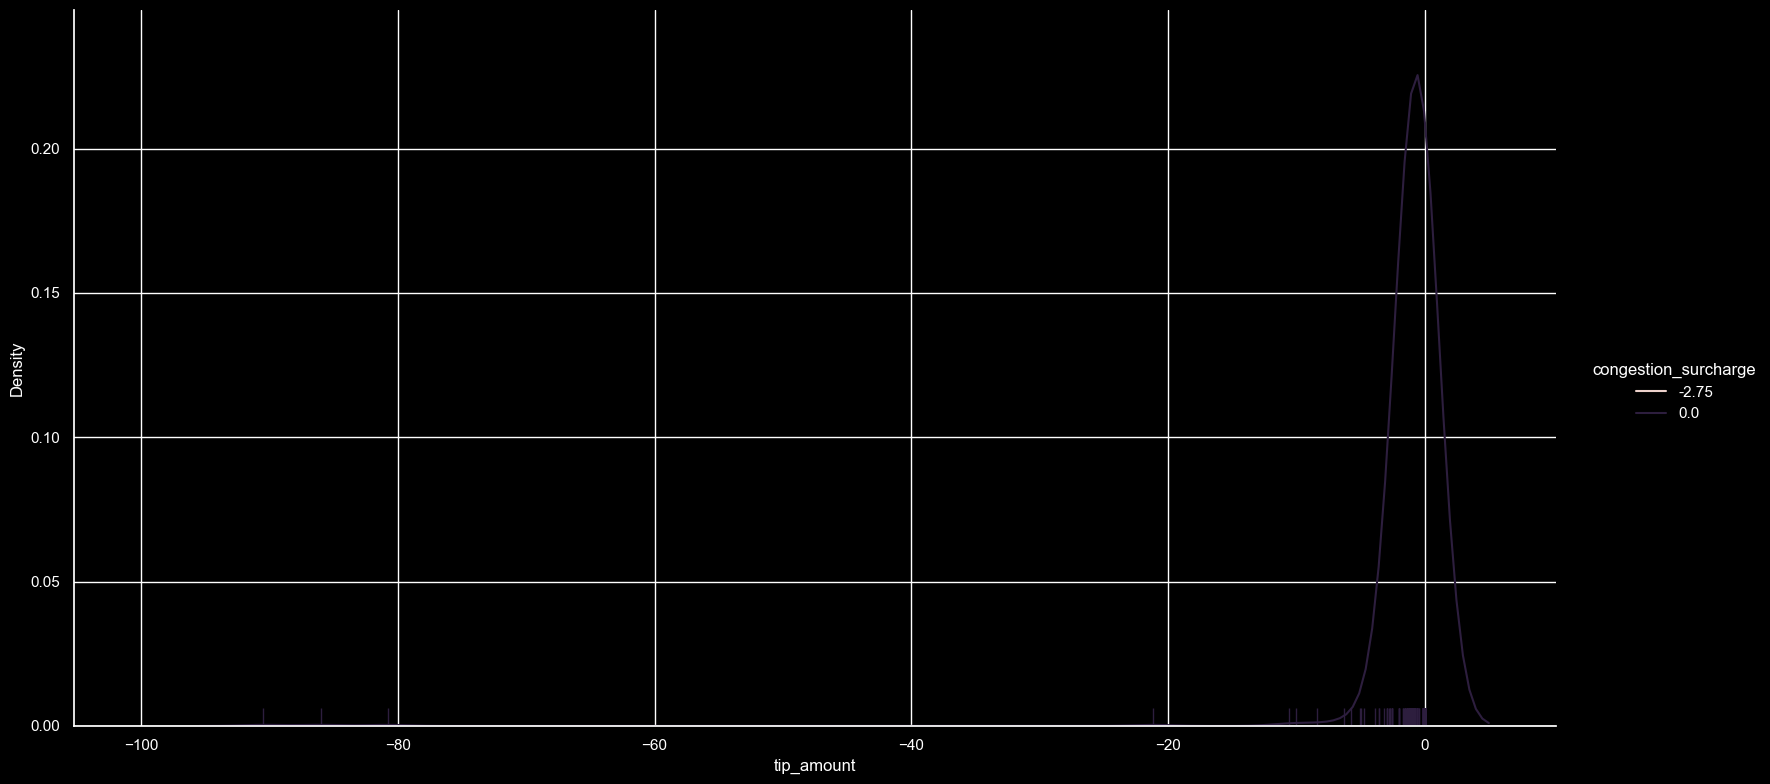

In [28]:
#sns.displot(df, x="tip_amount", binwidth=1)
for column in df.columns:
    if len(pd.unique(df[column])) < 10:
        sns.displot(data=df, x="tip_amount", rug=True, height=8, aspect=2.0, kind="kde", hue=column)

In [30]:
%%time

query = """
select
    *
from green
where total_amount < 0
""".lstrip()

df = c.execute(query).df()
df.head()

CPU times: user 669 ms, sys: 233 ms, total: 902 ms
Wall time: 1.21 s


,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2022-02-01 12:02:04,2022-02-01 12:07:43,N,1.0,43,75,1.0,0.34,-5.0,0.0,-0.5,0.0,0.0,NaN,-0.3,-5.8,3.0,1.0,0.0
1,2,2022-01-01 01:14:26,2022-01-01 01:19:18,N,1.0,42,166,1.0,0.72,-5.5,-0.5,-0.5,0.0,0.0,NaN,-0.3,-6.8,3.0,1.0,0.0
2,2,2022-01-01 02:50:04,2022-01-01 03:24:24,N,1.0,61,61,1.0,0.95,-5.0,-0.5,-0.5,0.0,0.0,NaN,-0.3,-6.3,4.0,1.0,0.0
3,2,2022-01-01 02:33:14,2022-01-01 02:36:35,N,1.0,116,116,1.0,0.57,-4.5,-0.5,-0.5,0.0,0.0,NaN,-0.3,-5.8,3.0,1.0,0.0
4,2,2022-01-01 11:11:28,2022-01-01 11:11:58,N,1.0,89,89,1.0,0.14,-2.5,0.0,-0.5,0.0,0.0,NaN,-0.3,-3.3,4.0,1.0,0.0


In [31]:
df.tail()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
50262,2,2018-06-30 23:55:10,2018-06-30 23:55:23,N,2.0,41,41,5.0,0.04,-52.0,0.0,-0.5,0.0,0.0,NaN,-0.3,-52.8,3.0,1.0,NaN
50263,2,2018-06-30 23:07:43,2018-06-30 23:11:17,N,1.0,146,193,1.0,0.68,-4.5,-0.5,-0.5,0.0,0.0,NaN,-0.3,-5.8,3.0,1.0,NaN
50264,2,2018-06-30 23:34:18,2018-06-30 23:37:41,N,1.0,145,145,1.0,0.60,-4.5,-0.5,-0.5,0.0,0.0,NaN,-0.3,-5.8,3.0,1.0,NaN
50265,2,2018-06-30 23:10:18,2018-06-30 23:15:56,N,1.0,74,74,1.0,0.90,-6.0,-0.5,-0.5,0.0,0.0,NaN,-0.3,-7.3,3.0,1.0,NaN
50266,2,2018-06-30 23:48:27,2018-06-30 23:54:29,N,1.0,188,188,1.0,0.14,-5.5,-0.5,-0.5,0.0,0.0,NaN,-0.3,-6.8,3.0,1.0,NaN


(-50.0, 0.0)

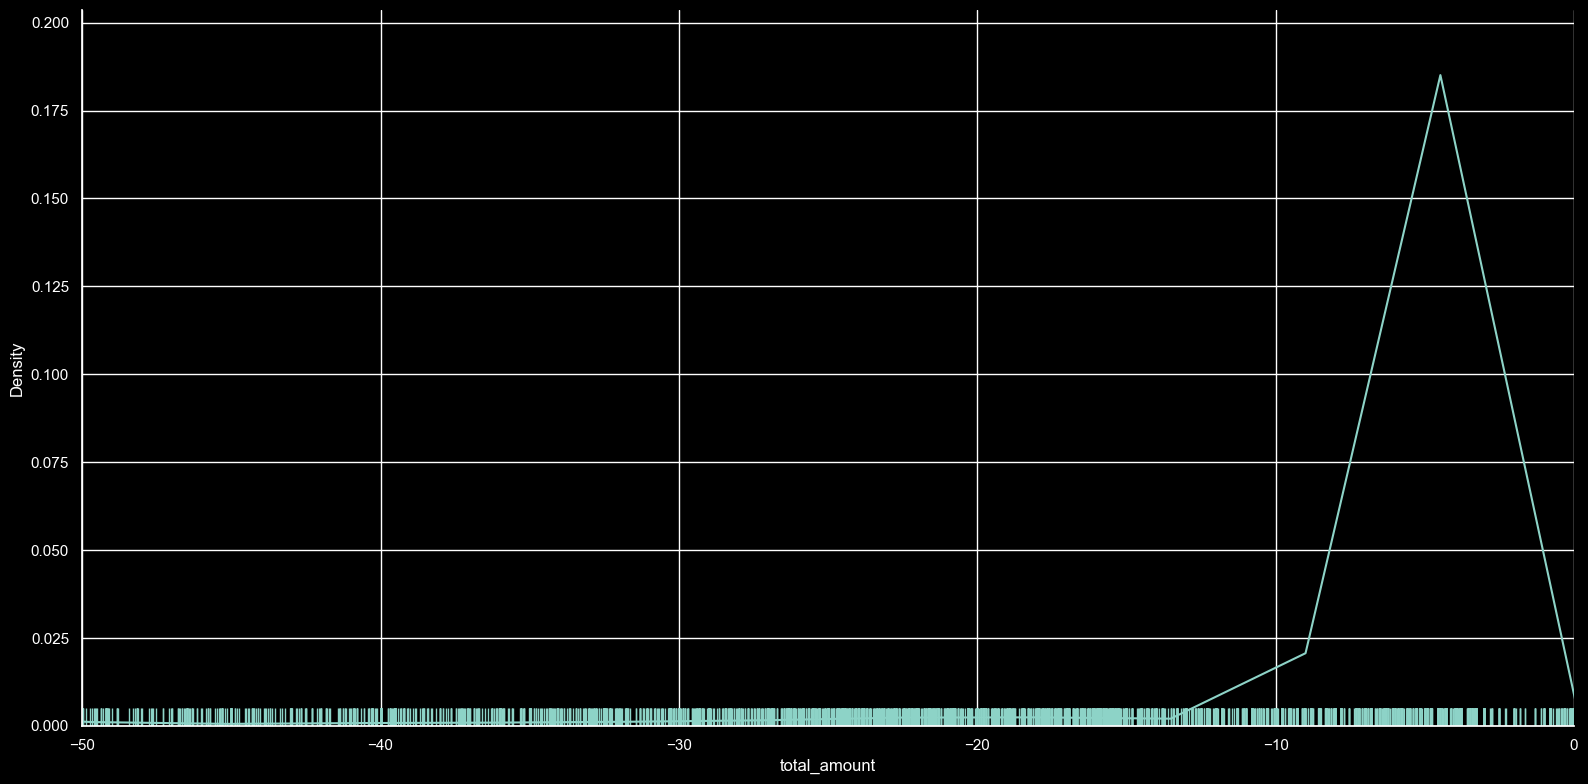

In [35]:
sns.displot(data=df, x="total_amount", rug=True, height=8, aspect=2.0, kind="kde")
plt.xlim(-50, 0)

/Users/cody/venvs/ddb/lib/python3.9/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/Users/cody/venvs/ddb/lib/python3.9/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/Users/cody/venvs/ddb/lib/python3.9/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/Users/cody/venvs/ddb/lib/python3.9/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/Users/cody/venvs/ddb/lib/python3.9/site-packages/seaborn/distributions.py:316: 

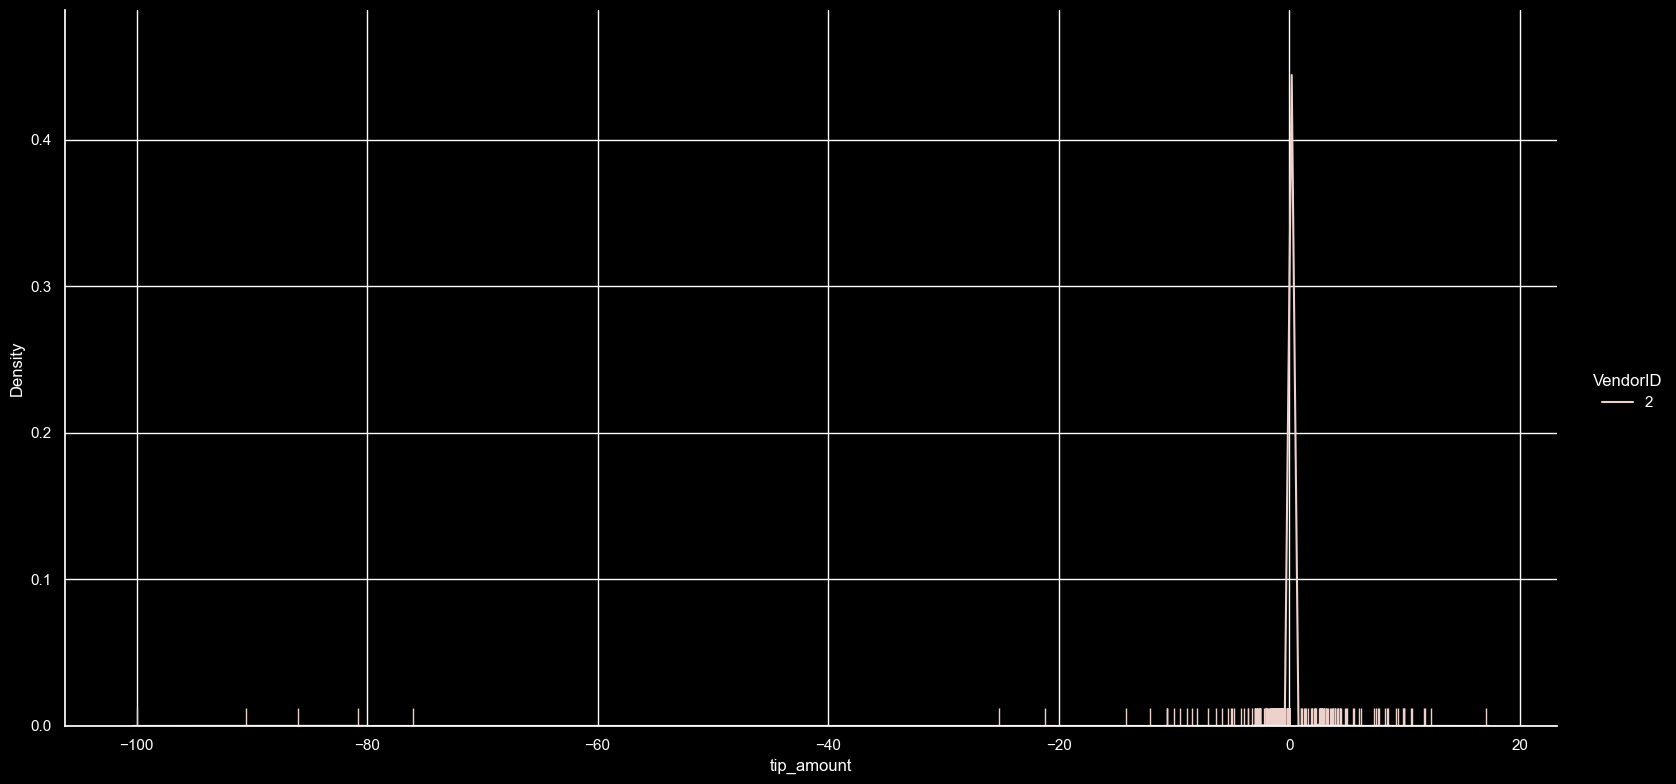

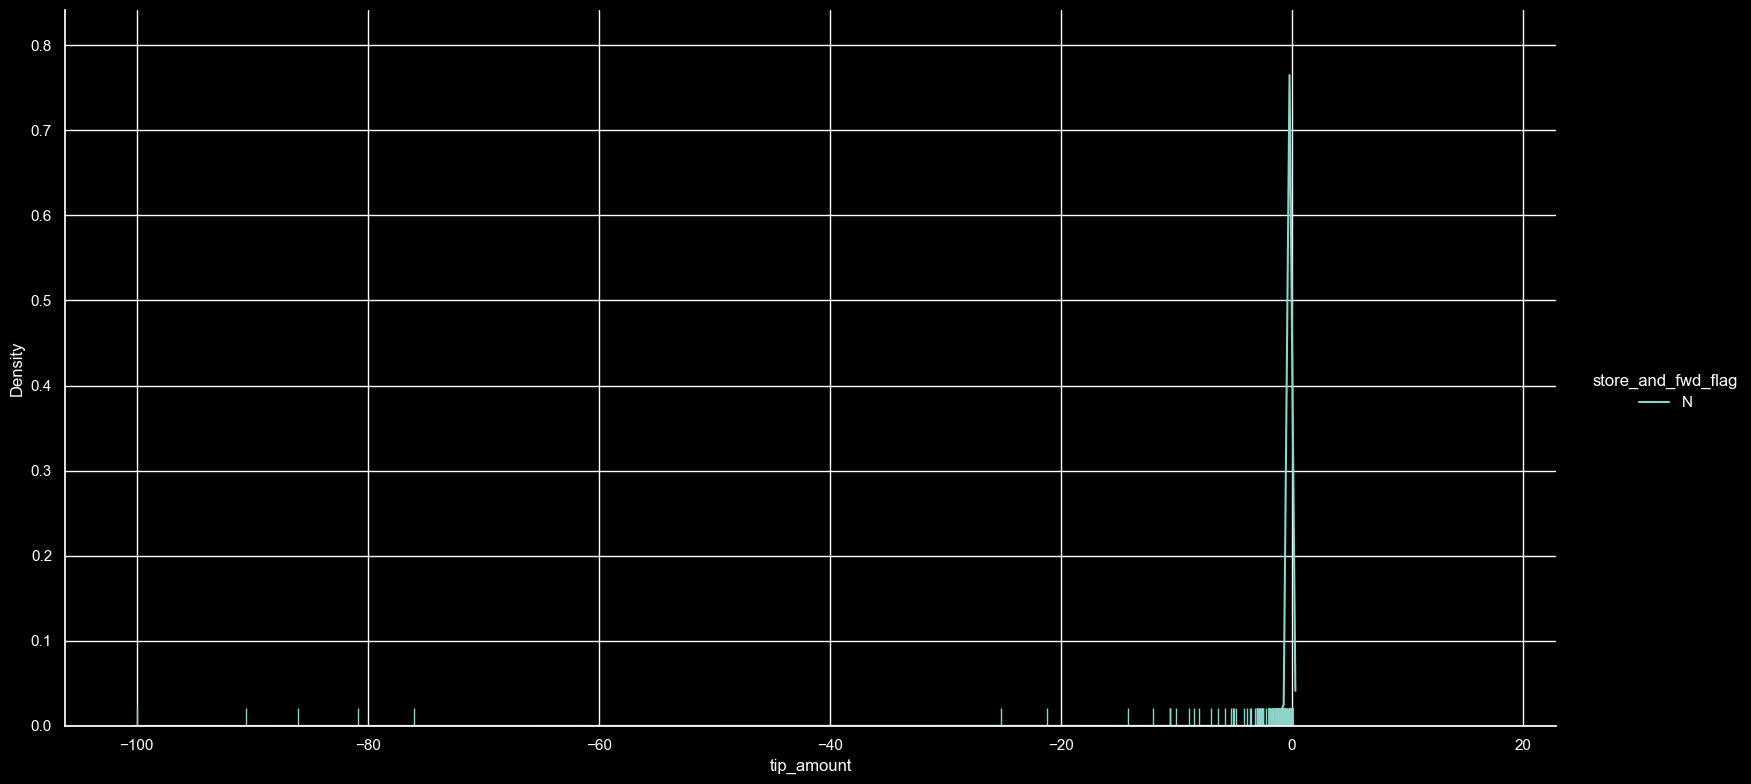

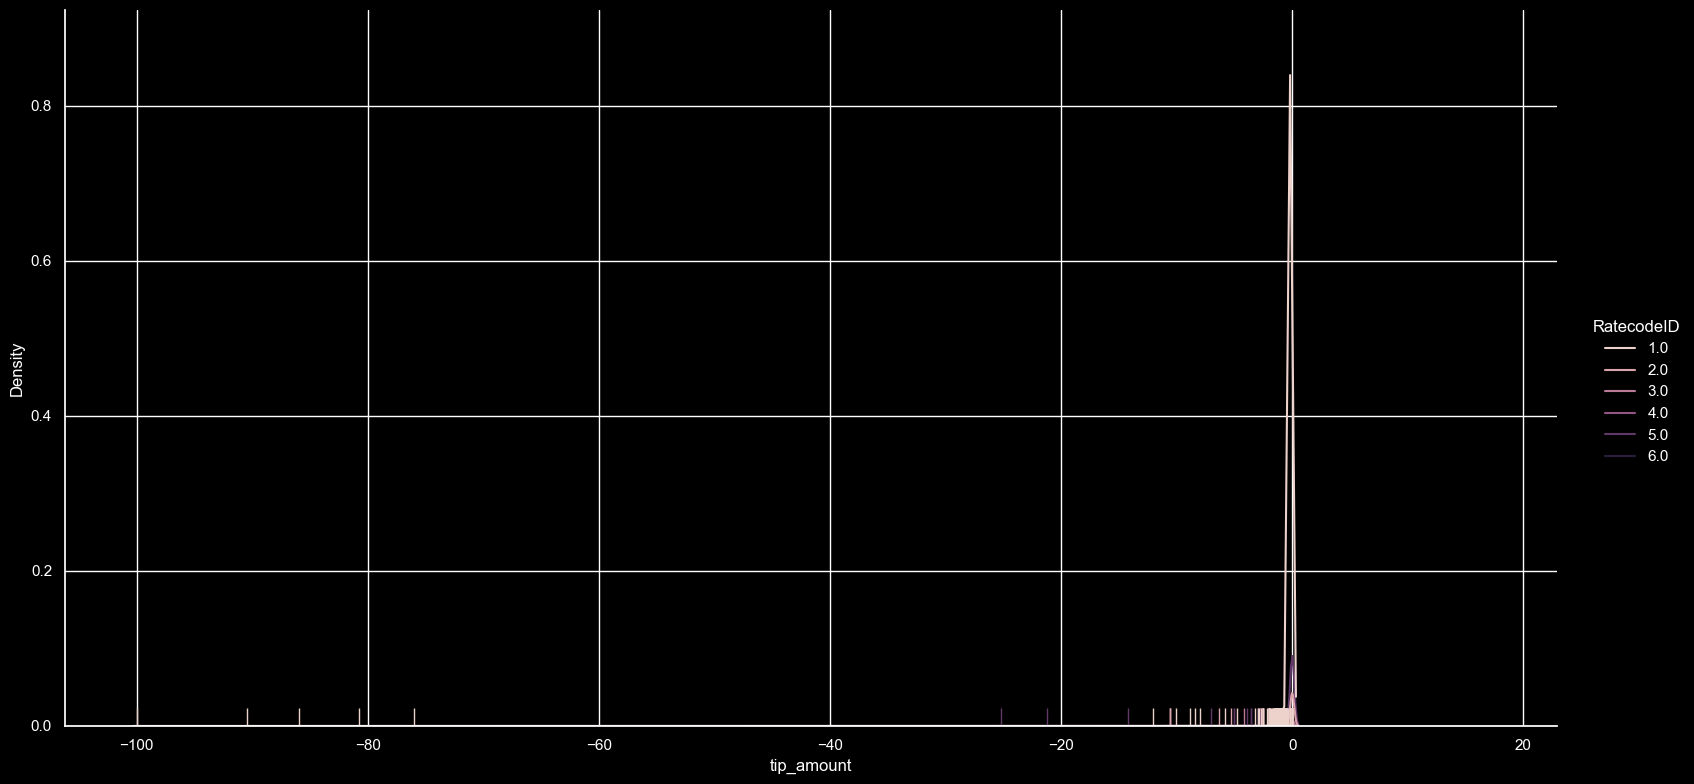

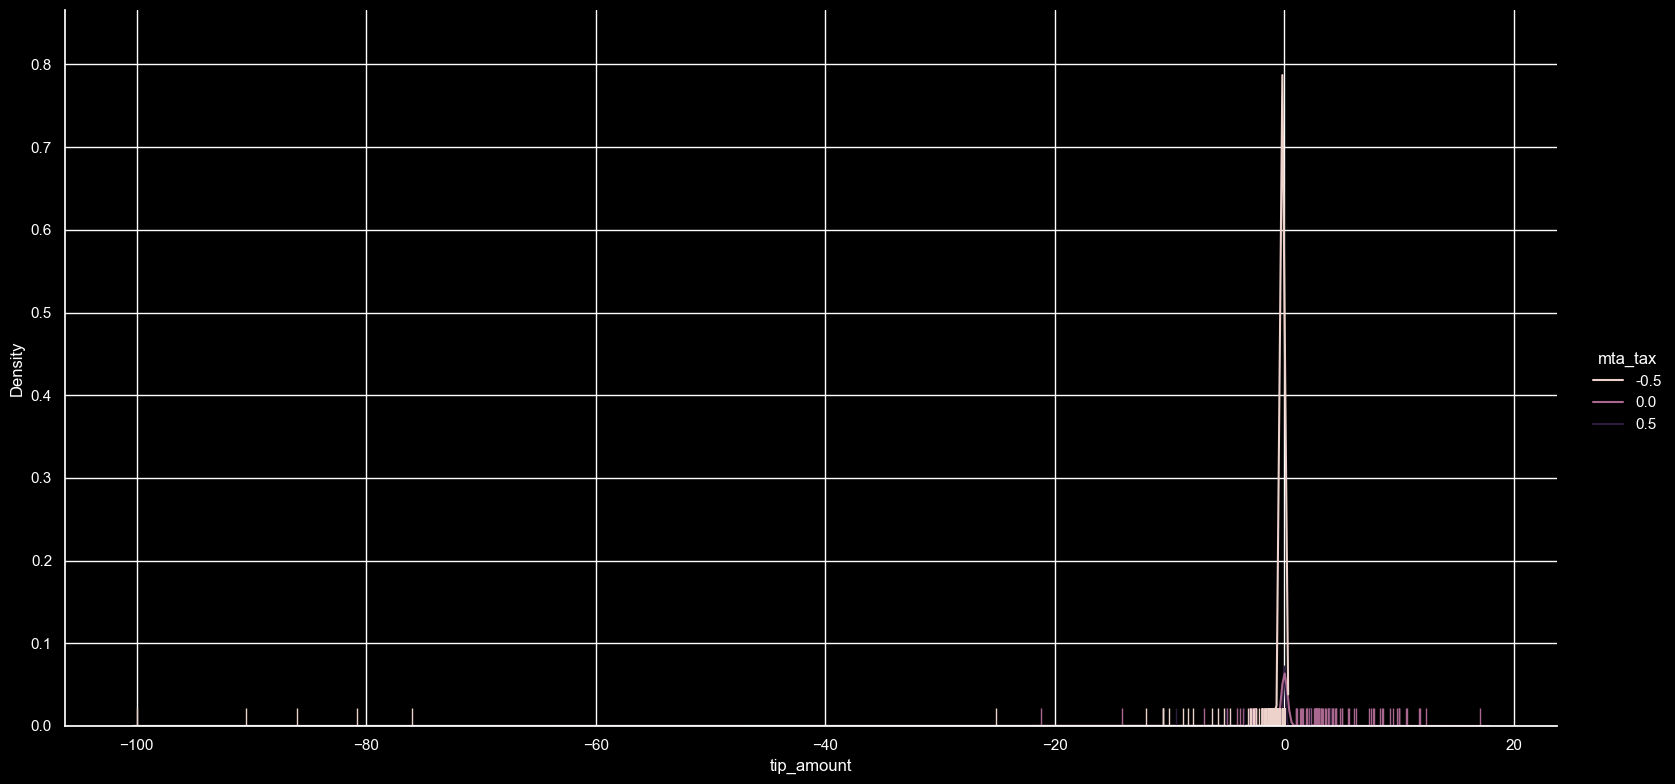

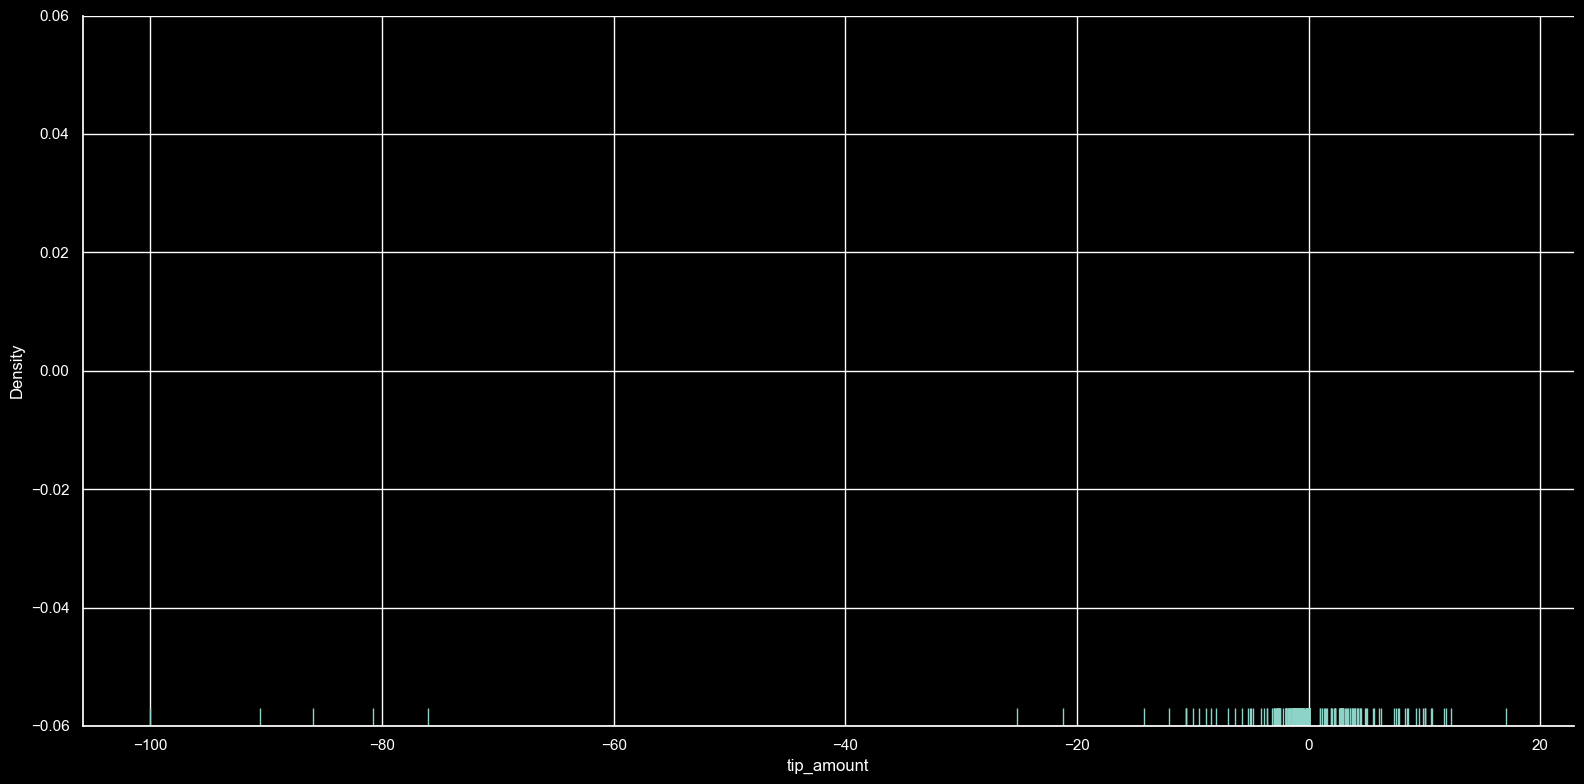

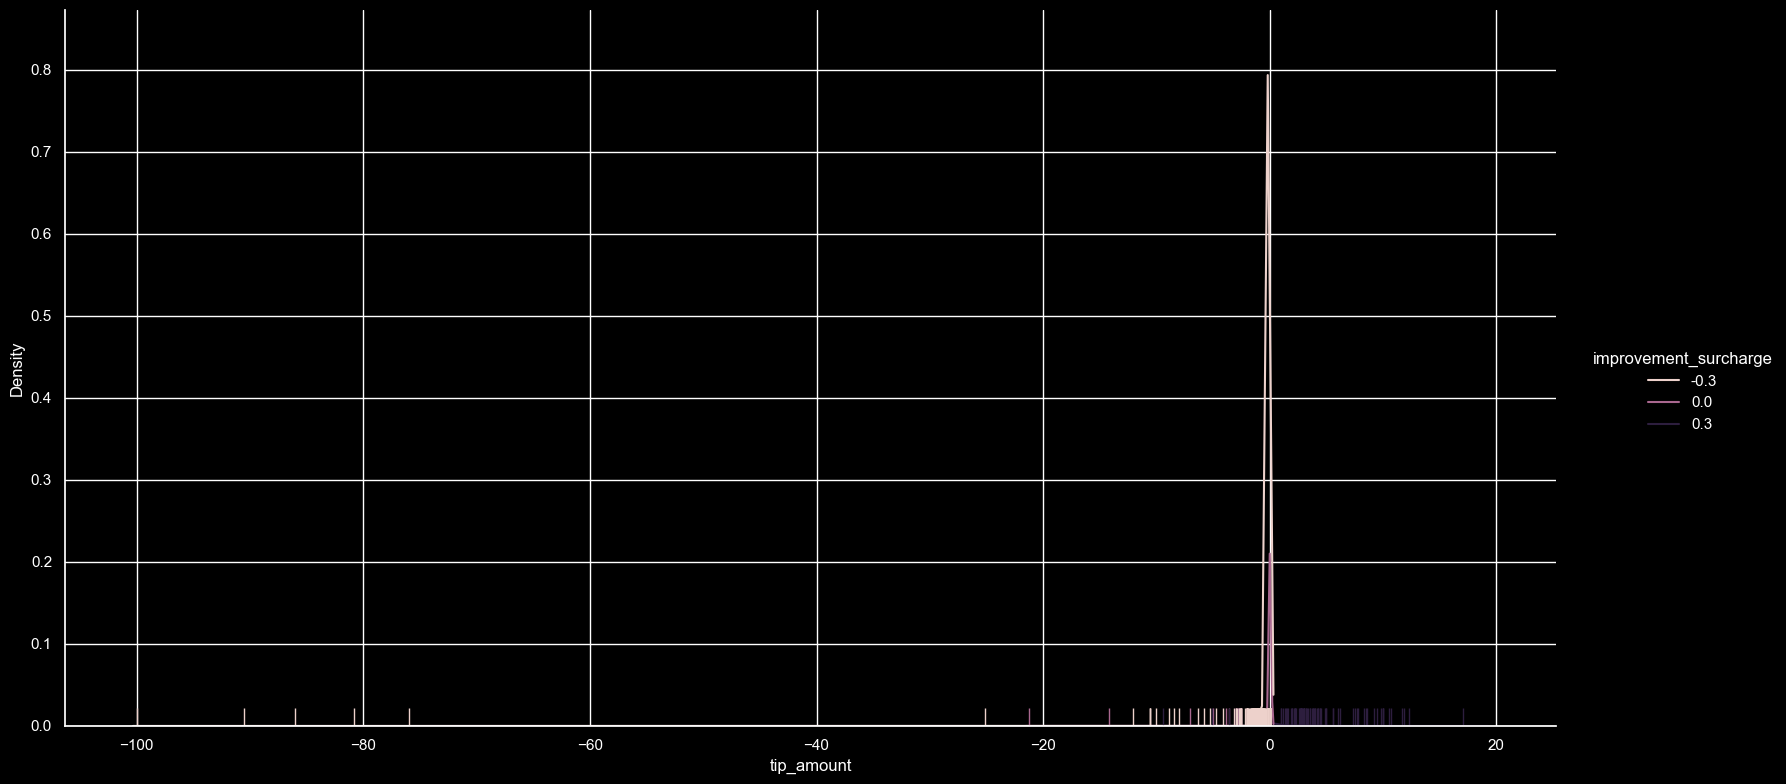

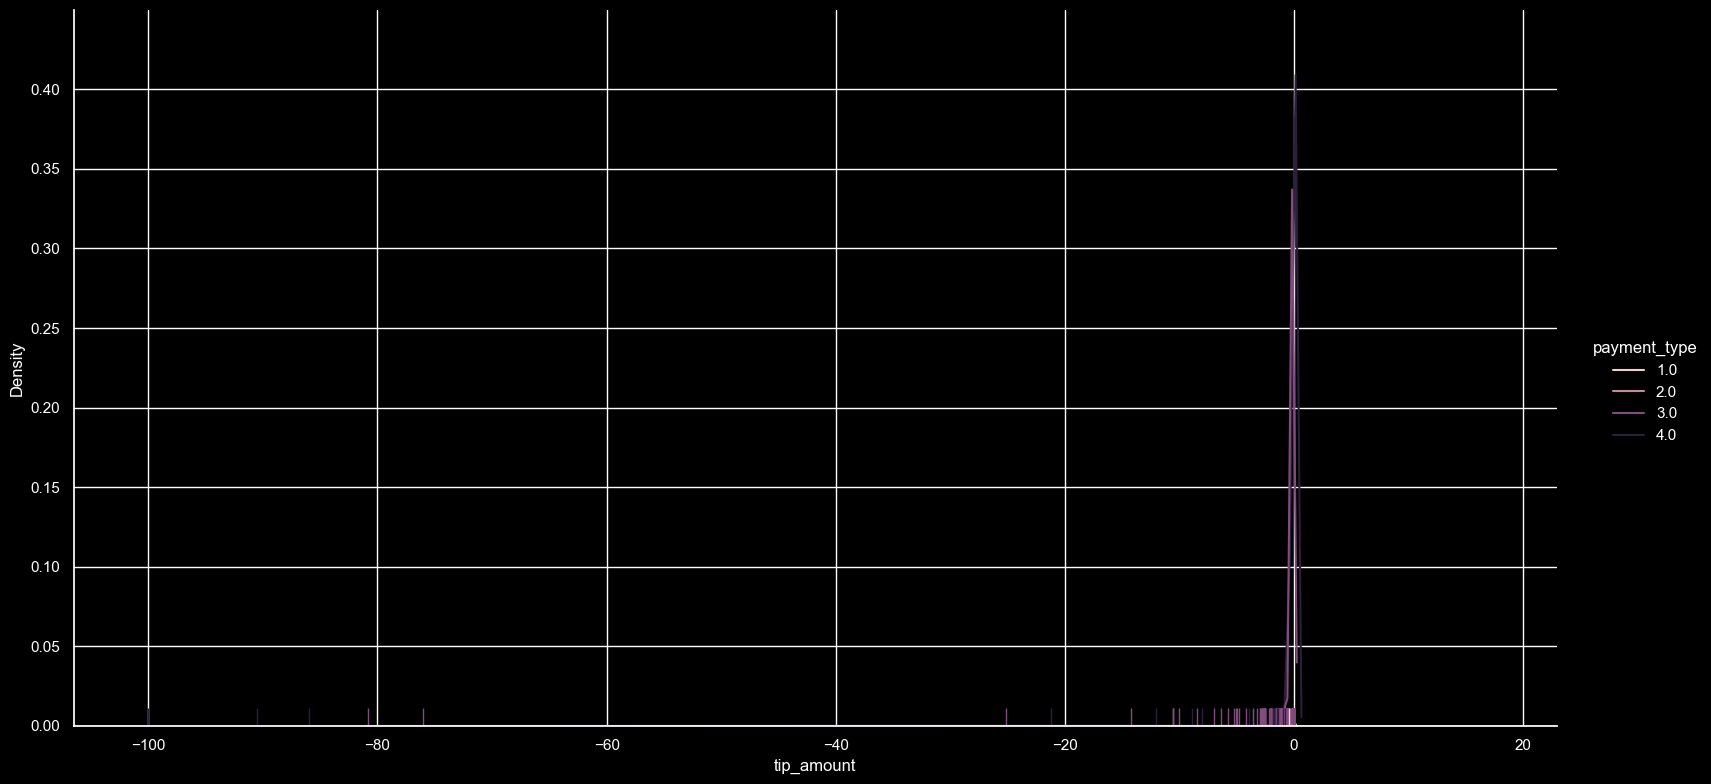

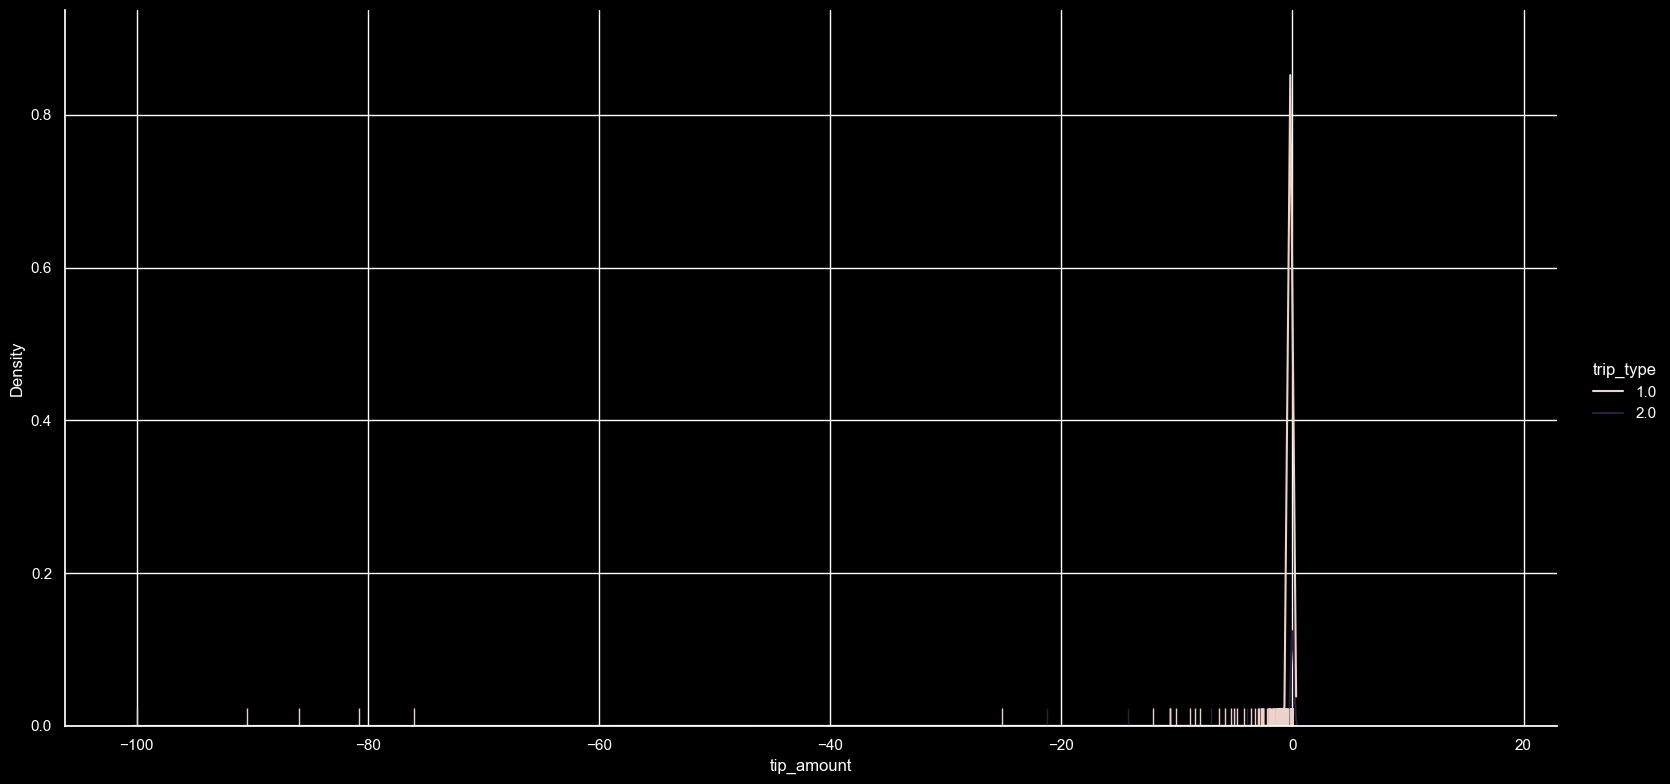

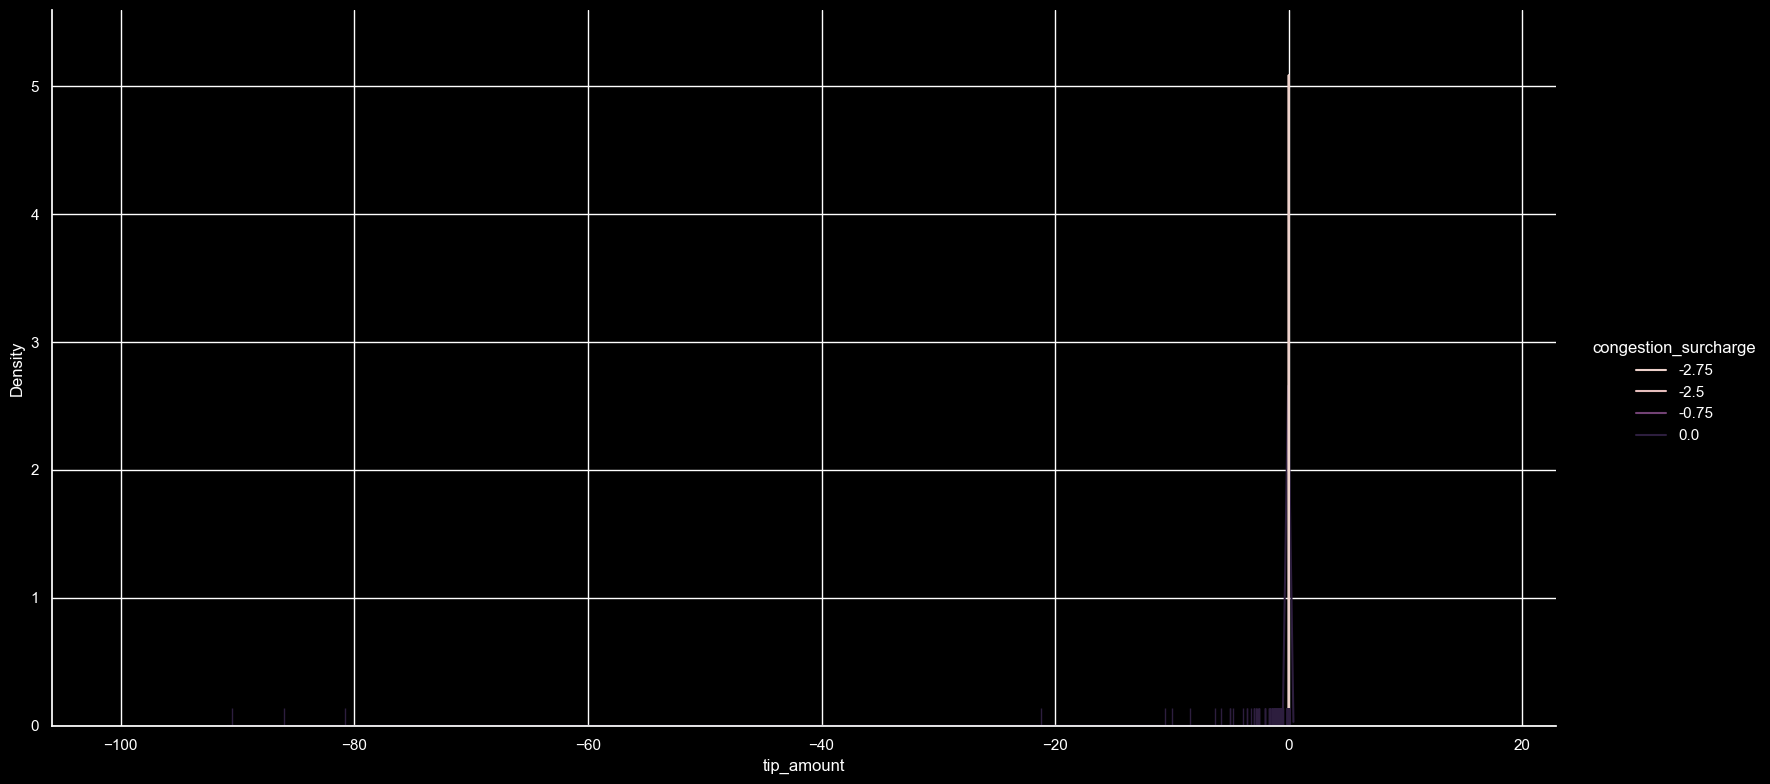

In [33]:
#sns.displot(df, x="tip_amount", binwidth=1)
for column in df.columns:
    if len(pd.unique(df[column])) < 10:
        sns.displot(data=df, x="total_amount", rug=True, height=8, aspect=2.0, kind="kde", hue=column)

In [36]:
c.close()
dc.close()